# Отчет

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('flights/flights.csv')
df1 = df.loc[~df[["DEPARTURE_TIME", "ARRIVAL_TIME"]].isna().any(axis=1)]
airlines = pd.read_csv('flights/airlines.csv')

C:\Users\nikit\AppData\Local\Temp\ipykernel_22552\1279529253.py:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flights/flights.csv')


# Задержка вылетов по аэропортам

Аэропорт в котором средняя задержка наибольшая: VEL 


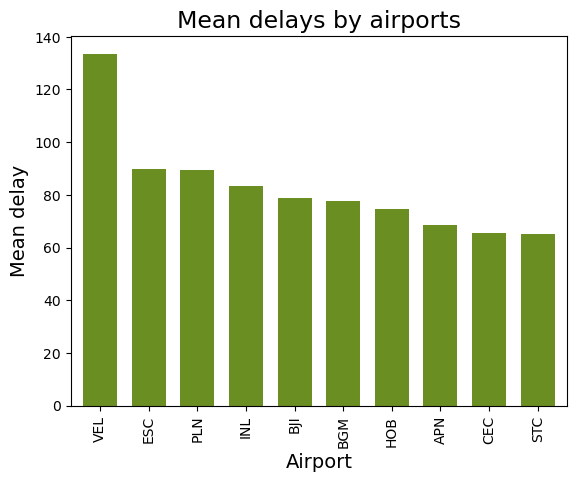

In [7]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.ylabel("Mean delay", fontsize = 14)
plt.title('Mean delays by airports', fontsize=17)

Y = df.loc[(df.DEPARTURE_DELAY > 0) & (df.ORIGIN_AIRPORT.apply(type) == str)]
Y = Y.loc[Y.ORIGIN_AIRPORT.apply(len) == 3].groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean()
Y = Y.sort_values(ascending=False)[:10]
Y.plot(kind='bar', color='olivedrab', width=0.7)
plt.xlabel("Airport", fontsize = 14)
print('\033[1m' + 'Аэропорт в котором средняя задержка наибольшая:', list(dict(Y).keys())[0], '\033[0m')

# Задержка вылетов по авиакомпаниям

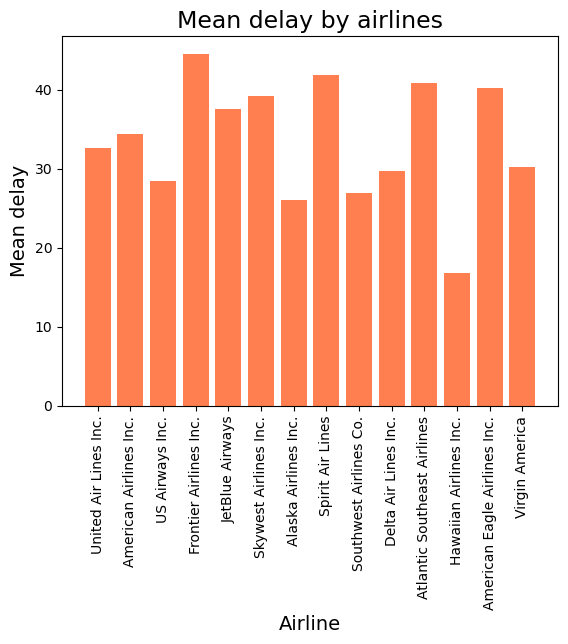

Авиакомпания в которой средняя задержка наибольшая: Frontier Airlines Inc. 


In [8]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

Y = dict(df.loc[df.DEPARTURE_DELAY > 0].groupby('AIRLINE')['DEPARTURE_DELAY'].mean())
Z = [Y[airlines['IATA_CODE'][i]] for i in range(14)]
X = list(airlines.AIRLINE)
plt.bar(X, Z, color='coral')
plt.xlabel("Airline", fontsize = 14)
plt.ylabel("Mean delay", fontsize = 14)
plt.xticks(X, fontsize=10, rotation=90)
plt.title('Mean delay by airlines', fontsize=17)
plt.show()
print('\033[1m' + 'Авиакомпания в которой средняя задержка наибольшая:', X[np.argmax(Z)], '\033[0m')

# Задержка вылетов по месяцам

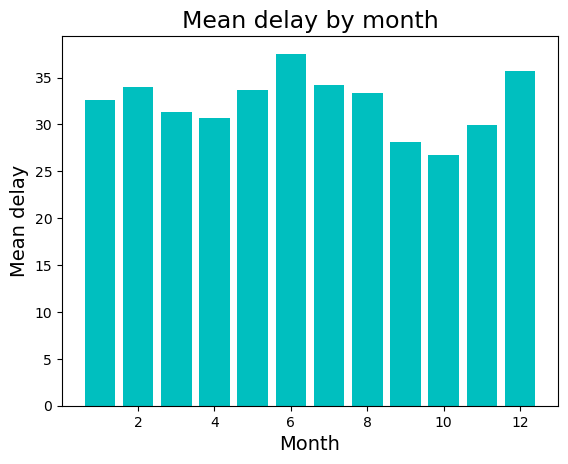

Месяц в котором средняя задержка наибольшая: 6 


In [9]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

Y = df.loc[df.DEPARTURE_DELAY > 0].groupby('MONTH')['DEPARTURE_DELAY'].mean()
X = np.arange(1,13)
plt.bar(X, Y, color='c')
plt.xlabel("Month", fontsize = 14)
plt.ylabel("Mean delay", fontsize = 14)
plt.title('Mean delay by month', fontsize=17)
plt.show()
print('\033[1m' + 'Месяц в котором средняя задержка наибольшая:', X[np.argmax(Y)], '\033[0m')

# Задержка вылетов по дням недели

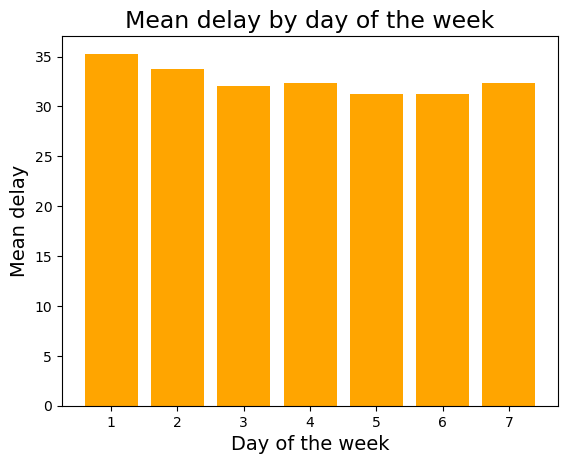

День недели в котором средняя задержка наибольшая: 1 


In [10]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

Y = df.loc[df.DEPARTURE_DELAY > 0].groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()
X = np.arange(1,8)
plt.bar(X, Y, color='orange')
plt.xlabel("Day of the week", fontsize = 14)
plt.ylabel("Mean delay", fontsize = 14)
plt.title('Mean delay by day of the week', fontsize=17)
plt.show()
print('\033[1m' + 'День недели в котором средняя задержка наибольшая:', X[np.argmax(Y)], '\033[0m')

# Причины отмены рейсов

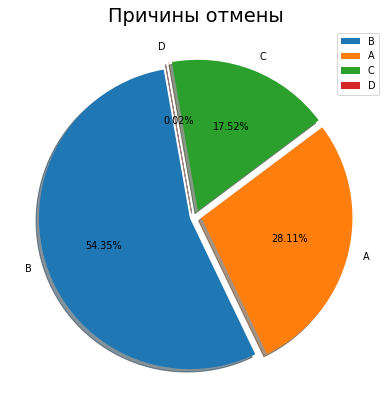

Самая частая причина отмены: B 


In [11]:
fig = plt.figure(figsize=(7, 7), dpi=70)
fig.patch.set_facecolor('xkcd:white')

Y = dict(df[~df.CANCELLATION_REASON.isna()].CANCELLATION_REASON.value_counts())
size = list(dict(Y).values())
labels = list(dict(Y).keys())
explode = [0.04, 0.04, 0.04, 0.04]
plt.pie(size, labels=labels, explode=explode, shadow=True, autopct='%1.2f%%', startangle=100)
plt.title('Причины отмены', fontsize=20)
plt.legend()
plt.show()
print('\033[1m' + 'Самая частая причина отмены:', 'B', '\033[0m')

# Дни недели с наибольшей задержкой из-за безопасности

День недели с наибольшей средней задержекой из-за безопасности: 1 


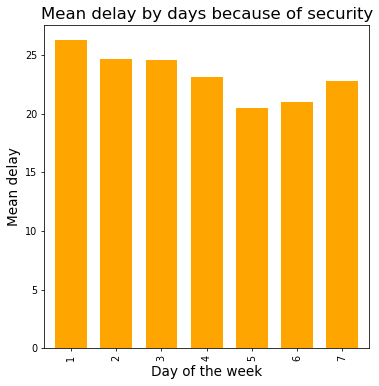

In [12]:
fig = plt.figure(figsize=(6, 6), dpi=70)
fig.patch.set_facecolor('xkcd:white')
plt.ylabel("Mean delay", fontsize = 14)
plt.title('Mean delay by days because of security', fontsize=17)

Y = df.loc[df.SECURITY_DELAY > 0].groupby('DAY_OF_WEEK')['SECURITY_DELAY'].mean()
Y.plot(kind='bar', color='orange', width=0.7)
plt.xlabel("Day of the week", fontsize = 14)
print('\033[1m' + 'День недели с наибольшей средней задержекой из-за безопасности:', np.argmax(Y)+1, '\033[0m')

# Месяц с макимальным числом задержек из-за погоды

Месяц с макимальным числом задержек из-за погоды: 2 


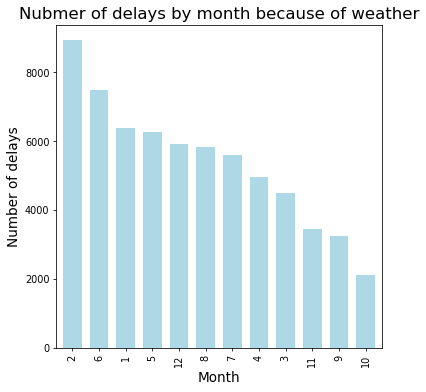

In [13]:
fig = plt.figure(figsize=(6, 6), dpi=70)
fig.patch.set_facecolor('xkcd:white')
plt.ylabel("Number of delays", fontsize = 14)
plt.xlabel("Month", fontsize = 14)
plt.title('Nubmer of delays by month because of weather', fontsize=17)

Y = df.loc[df.WEATHER_DELAY > 0, 'MONTH'].value_counts()
Y.plot(kind='bar', color='lightblue', width=0.7)
print('\033[1m' + 'Месяц с макимальным числом задержек из-за погоды:', list(dict(Y).keys())[0], '\033[0m')

# Месяц с наибольшим колличеством опозданий

Месяц в котором чаще всего происходит задержки: 2    0.429298
Name: MONTH, dtype: float64 


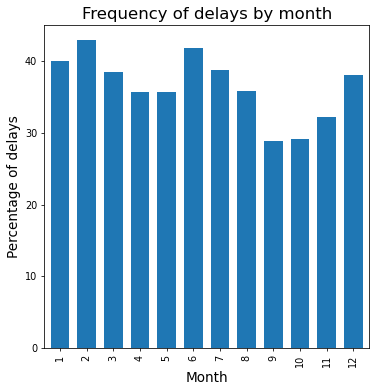

In [14]:
fig = plt.figure(figsize=(6, 6), dpi=70)
fig.patch.set_facecolor('xkcd:white')
plt.ylabel("Percentage of delays", fontsize = 14)
plt.xlabel("Month", fontsize = 14)
plt.title('Frequency of delays by month', fontsize=17)

T = df.loc[df.CANCELLED == 0, 'MONTH'].value_counts()
Y = df.loc[(df.CANCELLED == 0) & (df.ARRIVAL_DELAY > 0), 'MONTH'].value_counts()
(Y/T * 100).plot(kind='bar', width=0.7)
print('\033[1m' + 'Месяц в котором чаще всего происходит задержки:', (Y/T)[(Y/T).argmax():(Y/T).argmax()+1], '\033[0m')

# Аэропорт с наибольшим число отмен рейсов

Аэропорт с наибольшим число отмен рейсов: ORD    8548
Name: ORIGIN_AIRPORT, dtype: int64 


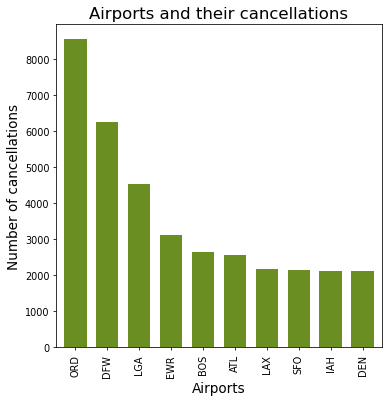

In [16]:
fig = plt.figure(figsize=(6, 6), dpi=70)
fig.patch.set_facecolor('xkcd:white')
plt.ylabel("Number of cancellations", fontsize = 14)
plt.xlabel("Airports", fontsize = 14)
plt.title('Airports and their cancellations', fontsize=17)

C = df.loc[(df.CANCELLED == 1) & (df.ORIGIN_AIRPORT.apply(type) == str)]
C = C.loc[C.ORIGIN_AIRPORT.apply(len) == 3, "ORIGIN_AIRPORT"].value_counts()
C[:10].plot(kind='bar', width=0.7, color='olivedrab')
print('\033[1m' + 'Аэропорт с наибольшим число отмен рейсов:', C[C.argmax():C.argmax()+1], '\033[0m')

# Авиакомпания с наибольшим число отмен рейсов

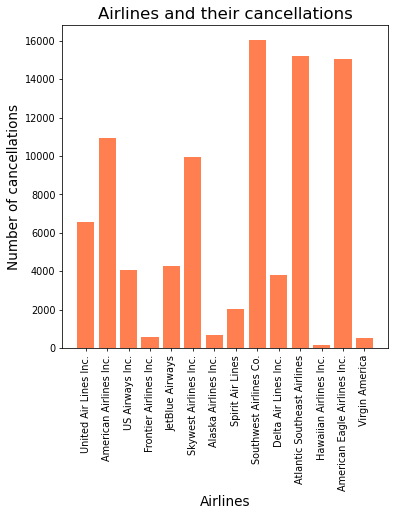

Авиакомпания с наибольшим число отмен рейсов: Southwest Airlines Co. 


In [17]:
fig = plt.figure(figsize=(6, 6), dpi=70)
fig.patch.set_facecolor('xkcd:white')

Y = dict(df.loc[df.CANCELLED == 1, 'AIRLINE'].value_counts())
Z = [Y[airlines['IATA_CODE'][i]] for i in range(14)]
X = list(airlines.AIRLINE)
plt.bar(X, Z, color='coral')
plt.xlabel("Airlines", fontsize = 14)
plt.ylabel("Number of cancellations", fontsize = 14)
plt.xticks(X, fontsize=10, rotation=90)
plt.title('Airlines and their cancellations', fontsize=17)
plt.show()
print('\033[1m' + 'Авиакомпания с наибольшим число отмен рейсов:', X[np.argmax(Z)], '\033[0m')